# Основы статистики

[Справка по математическим символам (LaTeX/Mathematics)](https://en.wikibooks.org/wiki/LaTeX/Mathematics)

Импорт модулей

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Введение

Обычно, размер исследуемых объектов(генеральная совокупность) слишком велик, поэтому исследователь отбирает часть данных(формирует выборку), которая должна быть моделью, отражать природу и  свойства (репрезентативная выборка) исследуемого набора данных. Затем исследователь обощает результаты на всю генеральную совокупность. 

### 1.2 Генеральная совокупность и выборка.

**Генеральная совокупность**\
множество всех объектов, относительно которых будем делать выводы в рамках исследования некоторой научной проблемы. (множество всех объектов на которые мы хотели бы обобщить исследование)

**Выборка**\
это метод исследования, когда из общей изучаемой (генреральной) совокупности однородных единиц отбирается некоторая её часть (выборочная совокупность) и только эта часть подвергается обследованию.

**Репрезентативная выборка**\
это часть целевой аудитории, которая отражает ключевые характеристики всей совокупности пользователей (пол, возраст, местоположение, интересы).\
Выборка считается репрезентативной, когда по выбранной маленькой группе можно судить о более широкой аудитории. То есть когда свойства, присущие выбранной из целевой аудитории группы, можно распространить на всю целевую аудиторию. \
Допустимая погрешность при расчёте репрезентативной выборки варьируется в пределах 1-5%.


#### Способы формирования выборок

**Простая случайная выборка(simple random sample)**\
Чтобы её сформировать мы случайным образом начинаем выбирать элементы генеральной совокупности для участия в нашем эксперименте или исследовании (репрезентативная)

In [2]:
# Load a sample dataframe
df = pd.read_csv('data/digital_marketing_campaign_dataset.csv')

# Select 10 random rows
sample_df = df.sample(frac=0.1) # or n = 10

sample_df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
4262,12262,34,Female,106900,PPC,Retention,9909.686130,0.077747,0.104919,38,8.490558,6.456375,39,5,1,7,179,IsConfid,ToolConfid,1
7013,15013,49,Female,93235,Referral,Awareness,2660.671281,0.210356,0.181141,16,6.770454,13.674115,89,13,6,0,669,IsConfid,ToolConfid,1
1936,9936,51,Male,77926,PPC,Retention,6634.575909,0.193506,0.180762,44,8.305793,4.603606,43,1,6,0,2835,IsConfid,ToolConfid,1
1290,9290,18,Female,107477,SEO,Retention,877.858665,0.018180,0.069756,44,3.621495,10.065931,29,19,8,4,1404,IsConfid,ToolConfid,1
1589,9589,29,Male,102097,Referral,Consideration,1064.813878,0.169248,0.135007,35,8.099628,11.293473,35,0,5,1,893,IsConfid,ToolConfid,1


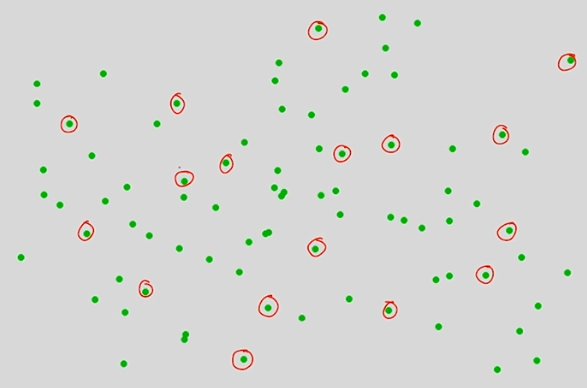

**Стратифицированная выборка**\
Перед тем, как случайным образом извлекать элементы генеральной совокупности для нашего исследования, мы сначала разобъем генеральную совокупность на несколько обособленных и различных по своей природе групп(страт)

In [3]:
df_male = df.loc[df['Gender'] == 'Male', :]\
            .sample(n=5)
df_female = df.loc[df['Gender'] == 'Female', :]\
            .sample(n=5)

In [4]:
frames = [df_male, df_female]
sample_df2 = pd.concat(frames)
sample_df2

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
4304,12304,50,Male,77290,Email,Conversion,7813.745356,0.275919,0.152540,36,6.441133,5.659986,26,12,6,7,536,IsConfid,ToolConfid,1
2447,10447,28,Male,71313,PPC,Retention,8424.769589,0.218630,0.137151,6,3.579945,4.653296,52,10,9,3,56,IsConfid,ToolConfid,1
2604,10604,20,Male,68737,SEO,Retention,5702.683681,0.276061,0.183775,46,8.211960,5.666648,68,7,7,7,72,IsConfid,ToolConfid,1
7319,15319,47,Male,60888,SEO,Retention,3812.240978,0.158551,0.114576,40,9.667532,1.800358,60,11,2,0,2151,IsConfid,ToolConfid,0
3052,11052,42,Male,149712,PPC,Retention,2155.352519,0.011548,0.151749,3,2.588474,4.848591,35,5,6,6,2886,IsConfid,ToolConfid,0
3398,11398,57,Female,121069,Referral,Conversion,9839.721533,0.200598,0.156258,34,1.480646,14.516681,26,10,6,9,141,IsConfid,ToolConfid,1
3150,11150,36,Female,22199,SEO,Awareness,6203.812223,0.090132,0.024936,22,1.458427,3.093519,24,6,1,8,3732,IsConfid,ToolConfid,0
1354,9354,49,Female,81897,Social Media,Consideration,3617.286876,0.044415,0.027218,24,8.335237,2.776264,61,0,2,1,2323,IsConfid,ToolConfid,0
562,8562,68,Female,83815,Social Media,Awareness,6916.984460,0.078056,0.099628,47,3.067384,2.976795,3,11,7,5,4094,IsConfid,ToolConfid,1
6772,14772,68,Female,105201,Social Media,Awareness,4131.871606,0.275443,0.023392,36,6.475966,5.621168,94,2,5,5,1663,IsConfid,ToolConfid,1


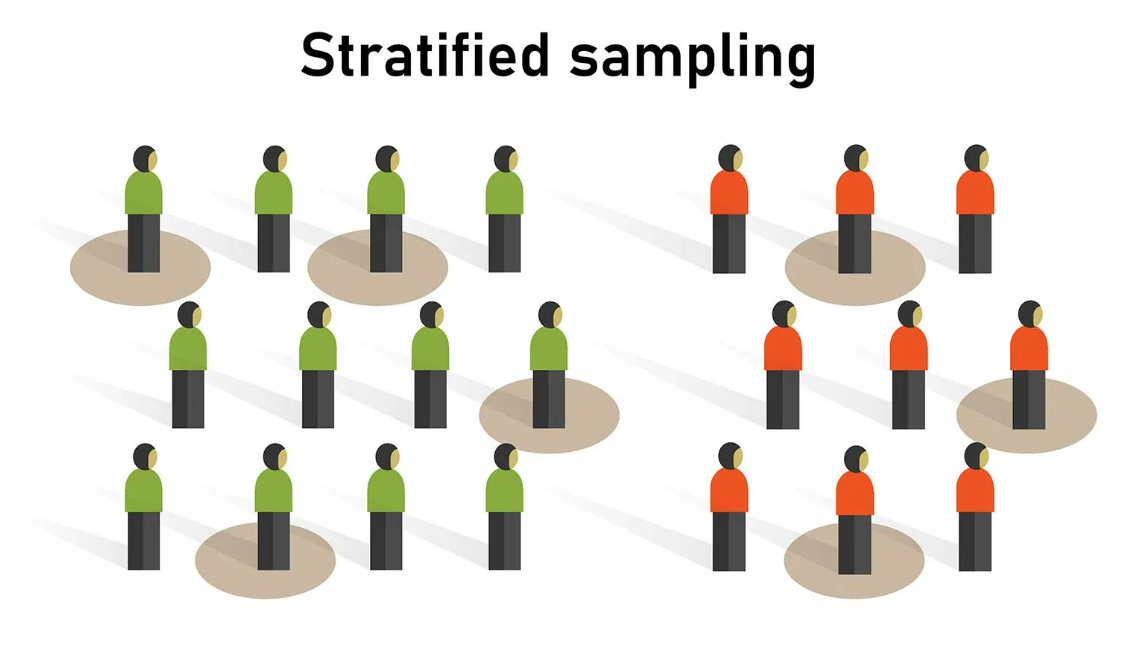

**Групповая выборка(claster sample)**\
Генеральная совокупность разделяется на несколько групп(кластеров), однако в данном случае все кластеры, напротив будут очень сильно похожи между собой. Способ используется для экономии ресурсов и времени при формировании выборки. Пример: делим Санкт-Петербург на несколько географических районов и можем быть уверены в том, что население данных районов сильно не оличается друг от друга. Затем отбираем несколько кластеров и методом случайной выборки формируем из них набор элементов для исследования.

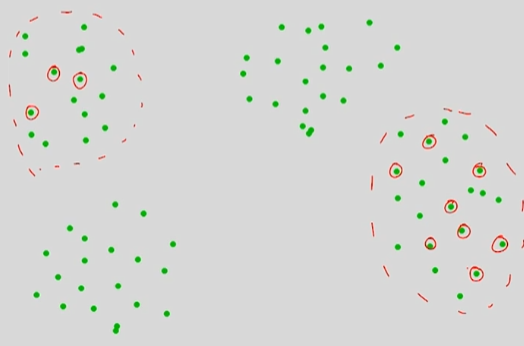

In [5]:
gr_select = df.loc[df['CampaignType'] == 'Consideration']

Разбиение на кластеры

In [7]:
cluster_1, cluster_2 = train_test_split(gr_select, test_size=0.5, train_size=0.5,
                 random_state=235)

In [8]:
cluster_1, cluster_2, cluster_3, cluster_4 = train_test_split(
    cluster_1, cluster_2,
    test_size=0.5,
    train_size=0.5,
    random_state=235)


In [9]:
for el in [cluster_1, cluster_2, cluster_3, cluster_4]:
    print(el.shape[0], end=' ')

497 497 497 497 

In [10]:
cluster_1 = cluster_1.sample(10)
cluster_4 = cluster_4.sample(10)

In [11]:
cluster_1.shape, cluster_2.shape

((10, 20), (497, 20))

---

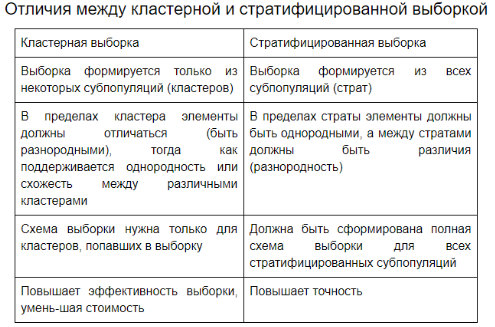

### 1.3. Типы переменных. Количественные и номинативные переменные

|Типы переменных|Подтипы|Описание|Пример|
|:---|:---:|:---|:---|
| Количественные | | Измеренное значение некоторого признака | Рост |
| | непрерывные | Может принимать любое значение на промежутке | Рост может принимать любое значение на промежутке от 160 до 190 см |
| | дискретные | Может принимать только определённые значения | число детей в семье: 1, 2, 3. А 3,5 ребёнка быть не может |
| Качественнные | | | |
| | номинативные/Категориальные | Нужны для разделения испытуемых на группы. За номинативными переменными не стоит никакого математического смысла (классификация). Цифры - это имена групп | Все участники женского пола обозначены цифрой 1, а мужского 2 (1 - ж, 2 - м) |
|  | ранговые | переменные, в которых можно установить порядок между значениями. Единственная математическая операция, допустимая в данном случае это сравнение. Но ни на сколько, ни во сколько сказать нельзя. Количественные переменные, такие, как возраст, доход, также можно использовать в качестве ранговых | оценки с значениями "плохо", "средне", "хорошо" или инофрмация а марафонском забеге, где каждому участнику присваивается место |

### 1.4 Меры центральной тенденции

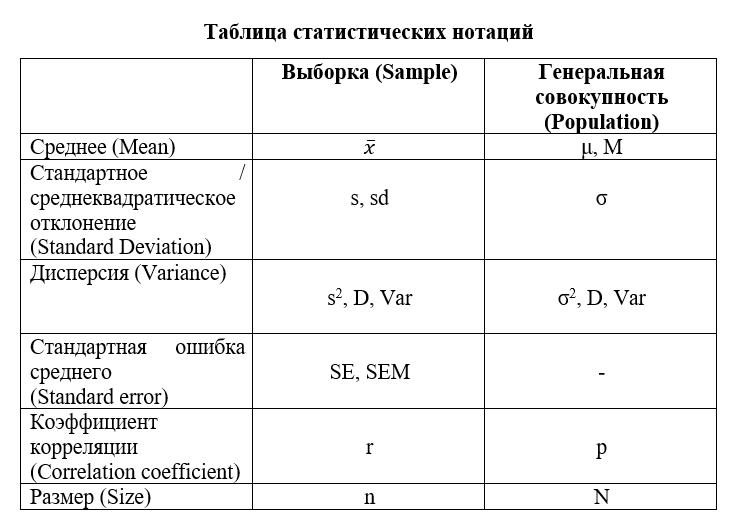

| Мера | Описание | Пример |
| :--- | :--- | :--- |
| Мода | значение измеряемого признака, которое встречается максимально часто |  |
| Медиана | значение признака, которое делит упорядоченное множество пополам |  |
| Среднее значение (mean) | сумма всех значений измеренного признака, деленная на количество измеренных значений |  |


> Если распределение симметрично, унимодально и не имеет заметных выбросов - можно использовать любую из мод центральной тенденции. Однако, если есть ассеметрия, заметны выбросы или несколько мод, тогда использование среднего значения может привести нас к некооректному результату и гораздо лучше использовать моду или медиану для того, чтобы охарактеризовать данные с точки выраженности некоторого количественного признака.

**Свойства среднего**
1. Если к каждому значению нашей выборки прибавить определённое число, то и среднее значение также увеличиться на это число;
2. Если мы каждое значение умножим на некоторое число, то и среднее значение также увеличиться в это же число раз;
3. Если мы для каждого значения в выборке рассчитаем такой показатель, как его отклонение от среднего арифметического, то сумма этих отклонений будет равняться 0;
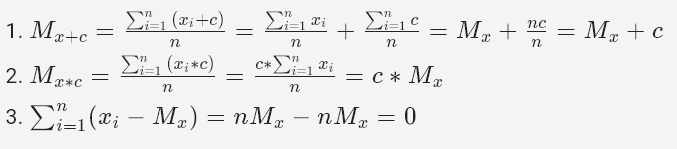

В ситуации унимодального и симметричного распределения именно среднее арифметическое очень часто используется в статистике и как в качестве меры центральной тенденции и для решения более интересных задач. 

### 1.5 Меры изменчивости

**Размах**

Размах (Range) - это разность максимального и минимального значения.

$R = X_{max} - X_{min}$

**Дисперсия**

Дисперсия (variance) - средний квадрат отклонений индивидуальных значений признака от их средней величины. (в квадрат возводят для того, чтобы положительное и отрицательные смещения не компенсировали друг друга)

$\Large D = \frac{\sum_{} (x_{i} - \bar{x})^2}{n}$

При этом показатель дисперсии будет превышать реальные средние отклонения наших наблюдений от среднего по выборке 

**Среднее квадратическое отклонение (СКО)**\
Чтобы вернуться к исходным единицам измерения, найдём корень из дисперсии - этот показатель называется среднее квадратическое отклонение (СКО)


| Размер данных | Формула | Примечание |
| :--- | :--- | :--- |
| генеральная совокупность | $\Large\sigma=\sqrt{\frac{\sum_{} (x_{i} - \bar{x})^2}{n}}$ | |
| выборка | $\Large sd=\sqrt{\frac{\sum_{} (x_{i} - \bar{x})^2}{n-1}}$ | Учитываем степени свободы и корректируем значение с помощью n - 1 |


**Свойства дисперсии**

> Если к каждому наблюдению выборки, прибавить некоторое число в таком случае ни дисперсия, ни стандартное отклонение нового распределия не изменится и не будет отличаться от предидущего значения.
> 
> $\large D_{x+c} = D_x$ 
> 
> $\large sd_{x+c} = sd_x$
>
> 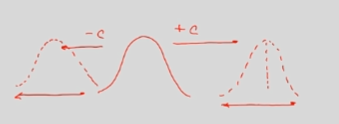

> Если значение каждого признака умножить на некоторое число, отличное от 0 и 1, то распределение будет более широким. Изменчивость данных увеличиться.
> 
> $\large D_{x*c} = D_x * c^2$
>
>$\large sd_{x*c} = sd_x*c$
>
> 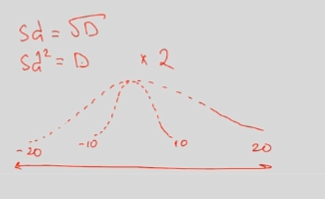


### 1.6 Квартили распределения и график box-plot

| Понятие | Определение |
| :--- | :--- |
| Квантили распределения | это такие значения признака, которые делят упорядченные данные на некоторое число равных частей |
| Квартили распределения | это такие три точки, которые делят наши данные на четыре(4)   равные части |

**Кваритили**

> Делим данные пополам медианой, затем каждую половину еще раз медианой пополам. 
Используя квартили, можно легко описать наше распределение и построить график box-plot

**Box plot (ящик с усами)**

> Он позволяет визиуализировать обширную информацию о данных. Описание ящика:
> -  центром графика является медиана значений или 2-ой квартиль наших данных;
> -  верхняя граница - это 3-ий квартиль;
> -  нижняя граница - это 1-ый квартиль.
>   
> Расстояние между 1 и 3 квартилем называется межквартильный размах - используется в качестве одной из мер изменчивости. Чем больше межквартильный размах, там больше вариативность признака.
>
> Отложим 1,5 межквартильного размаха вверх и вниз от границ межквартильного размаха, те значения признака которые последними принадлежат этому промежутку и будут границами усов графика.
>
> Точки за пределами границ являются выбросами
>
> 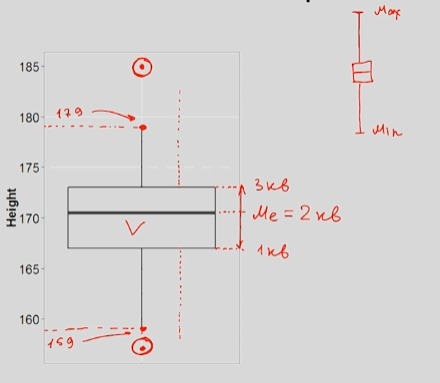

> 50% наблюдений окажется между первым и третьим квартилем, остальные окажутся в интервале усов,  а те, что будут за границами усов - это данные, которые значительно отличаются от остальных
> 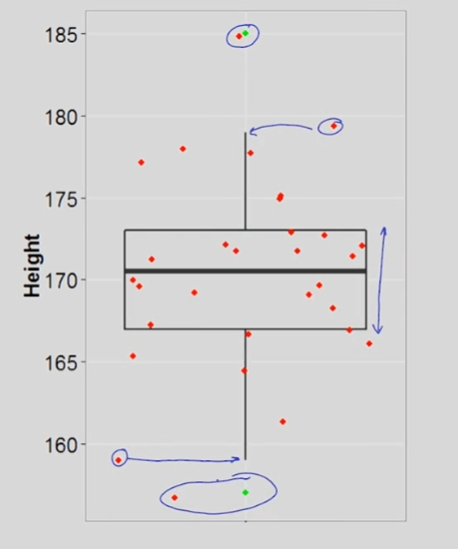

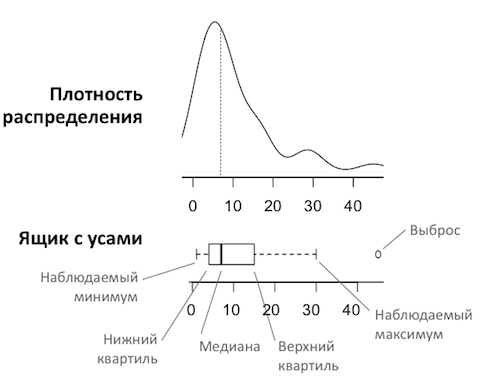

### 1.7 Нормальное распределение

- это унимодальное и симметричное распределение, отклонения от среднего равновероятны и подчиняются определённому равновероятностному закону:
    -  в диапазоне от среднего ($\mu$) до одного стандартного отклонения ($1\sigma$) будут находиться приблизиительно 34.1 % всех наблюдений;
    -  в диапазоне от $1\sigma$ до $2\sigma$ - примерно 13.6% всех наблюдений;
    -  в диапазоне от $2\sigma$ до $3\sigma$ - примерно 2.1% всех наблюдений;
    -  свыше $3\sigma$ - 0.1% всех наблюдеий.

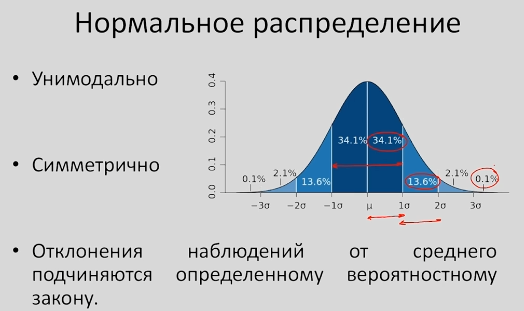

В природе большое количество характеристик реально распределены нормальным образом.

**Z-стандартизация**

- это такое преобразование наших данных, которое позволяет нам любую шкалу перевести в следующий тип(Z-шкалу/Z-scores), где среднее значение будет равняться 0 ($M_z = 0$), а  дисперсия будет равняться 1 ($D_z = 1$).

> для преобразования в Z шкалу необходимо из каждого наблюдения в выборке отнять среднее значение по выборке и разделить на стандартное отклонение по выборке
> $ \large Z_i = \frac{x_i - \bar{X}}{sd}$